# Comparative Analysis
In this notebook, we compare Window with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
variants = [
    ("l1", 0.85),
    ("l2", 0.45),
    ("normal", 0.95),
    ("ar", 0.2),
    ("mahalanobis", 0.85),
    ("rank", 0.95)
]

methods = list()

for cost, t in variants:
    candidate_name = f"{cost}-cost-{t}-threshold"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/window_cost_threshold/{file_name}")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,l1-cost-0.85-threshold,l2-cost-0.45-threshold,normal-cost-0.95-threshold,ar-cost-0.2-threshold,mahalanobis-cost-0.85-threshold,rank-cost-0.95-threshold
0,DodgerLoopDay,0.123,0.064,0.066,1.000,0.061,0.060
1,EEGRat,0.500,0.641,0.697,0.616,0.730,0.729
2,EEGRat2,0.500,0.500,0.500,0.856,0.500,0.500
3,FaceFour,0.281,0.281,0.684,0.281,0.281,0.281
4,GrandMalSeizures2,0.057,0.012,0.606,0.013,0.446,0.446
5,GreatBarbet1,0.355,0.355,0.355,0.355,0.355,0.355
6,Herring,1.000,0.445,0.553,1.000,1.000,1.000
7,InlineSkate,0.530,0.081,0.049,0.732,0.182,0.157
8,InsectEPG1,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.149,0.149,0.149,0.403,0.149,0.149


Let's calculate the mean/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3276/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


l1-cost-0.85-threshold             0.402
l2-cost-0.45-threshold             0.343
normal-cost-0.95-threshold         0.427
ar-cost-0.2-threshold              0.514
mahalanobis-cost-0.85-threshold    0.427
rank-cost-0.95-threshold           0.426
dtype: float64

In [6]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3276/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


l1-cost-0.85-threshold             0.258
l2-cost-0.45-threshold             0.215
normal-cost-0.95-threshold         0.219
ar-cost-0.2-threshold              0.290
mahalanobis-cost-0.85-threshold    0.232
rank-cost-0.95-threshold           0.233
dtype: float64

Let's compute the wins per method.

In [7]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [8]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

l1-cost-0.85-threshold:wins=7 rank=2.33333
l2-cost-0.45-threshold:wins=6 rank=2.71429
normal-cost-0.95-threshold:wins=9 rank=2.09524
ar-cost-0.2-threshold:wins=14 rank=2.09524
mahalanobis-cost-0.85-threshold:wins=8 rank=1.90476
rank-cost-0.95-threshold:wins=7 rank=2.0


Let's plot and output the ranks.

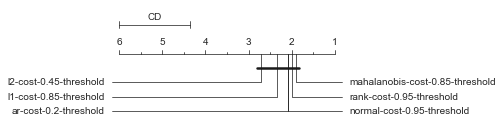

In [9]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, ranks.columns, cd=cd, reverse=True, width=5,
                                      filename="../../figures/cd_ablation_window_cost_threshold.pdf")

Let's compute pairwise wins/losses.

In [10]:
selection = "ar-cost-0.2-threshold"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ar-cost-0.2-threshold vs l1-cost-0.85-threshold: (wins/ties/losses): 10/8/3
ar-cost-0.2-threshold vs l2-cost-0.45-threshold: (wins/ties/losses): 11/7/3
ar-cost-0.2-threshold vs normal-cost-0.95-threshold: (wins/ties/losses): 9/5/7
ar-cost-0.2-threshold vs mahalanobis-cost-0.85-threshold: (wins/ties/losses): 8/8/5
ar-cost-0.2-threshold vs rank-cost-0.95-threshold: (wins/ties/losses): 8/8/5


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3276/4072302408.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3276/4072302408.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


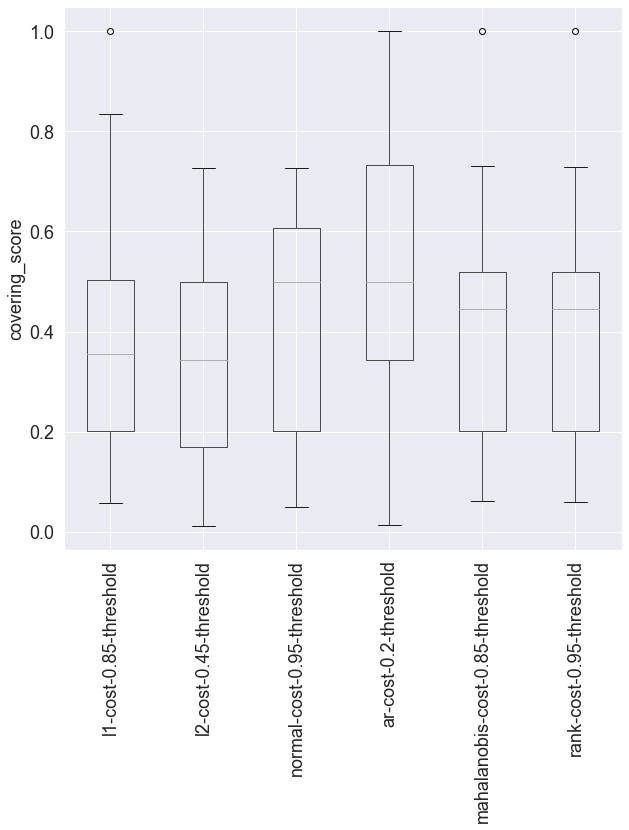

In [11]:
fontsize = 18
_, ax = plt.subplots(figsize=(10, 10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig("../../figures/bp_ablation_window_cost_threshold.pdf", bbox_inches="tight") 